In [1]:
import scanpy as sc
import matplotlib as mpl

In [5]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [7]:
ANNO_COL = "manual_celltype_annotation"
adata = sc.read_h5ad("./anndata_manual_anno.h5ad")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,keep,RNA_snn_res.0.3,RNA_snn_res.0.6,RNA_snn_res.1,RNA_snn_res.1.2,seurat_clusters,...,size_factors,_scvi_batch,_scvi_labels,leiden,leiden_0_25,leiden_0_5,leiden_2,leiden_00_25,leiden_00_5,manual_celltype_annotation
AAACCTGAGGGCATGT-1_1,GSM6685496,13612.0,2694,3.364678,True,0,3,2,2,2,...,1.782377,0,0,0,0,0,15,0,0,Epineurial fibroblasts
AAACCTGAGTACACCT-1_1,GSM6685496,10047.0,2492,2.408679,True,0,0,2,5,5,...,1.587755,0,0,0,0,0,4,0,0,Epineurial fibroblasts
AAACCTGAGTACCGGA-1_1,GSM6685496,13943.0,3014,4.059385,True,0,4,3,16,16,...,2.133652,0,0,6,0,4,4,0,0,Epineurial fibroblasts
AAACCTGCAGCATGAG-1_1,GSM6685496,13575.0,2897,3.543278,True,0,0,1,2,2,...,1.905368,0,0,0,0,0,15,0,0,Epineurial fibroblasts
AAACCTGGTACTTGAC-1_1,GSM6685496,3416.0,1045,2.927400,True,6,7,18,21,21,...,0.466495,0,0,10,8,10,29,4,3,T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACTAAGTC-1_33,GSM6685528,2847.0,1269,1.685985,True,5,5,10,11,11,...,0.628226,32,0,8,4,6,31,3,4,Endothelial cells
TTTGTCACATGGGAAC-1_33,GSM6685528,3131.0,1267,9.134462,True,8,8,5,6,6,...,0.556062,32,0,7,7,8,14,2,2,Schwann cells
TTTGTCAGTCGAACAG-1_33,GSM6685528,8068.0,2319,3.532474,True,4,0,1,1,1,...,1.398253,32,0,2,0,0,1,0,0,Epineurial fibroblasts
TTTGTCATCAGAAATG-1_33,GSM6685528,6722.0,1805,3.049688,True,1,1,7,10,10,...,1.028753,32,0,18,1,2,23,1,1,Macrophages


In [8]:
# adata.obs["group"] = adata.obs["organs"]
adata.obs["cell_type"] = adata.obs[ANNO_COL]

In [9]:
group_counts = adata.obs["group"].value_counts()

<Axes: xlabel='group'>

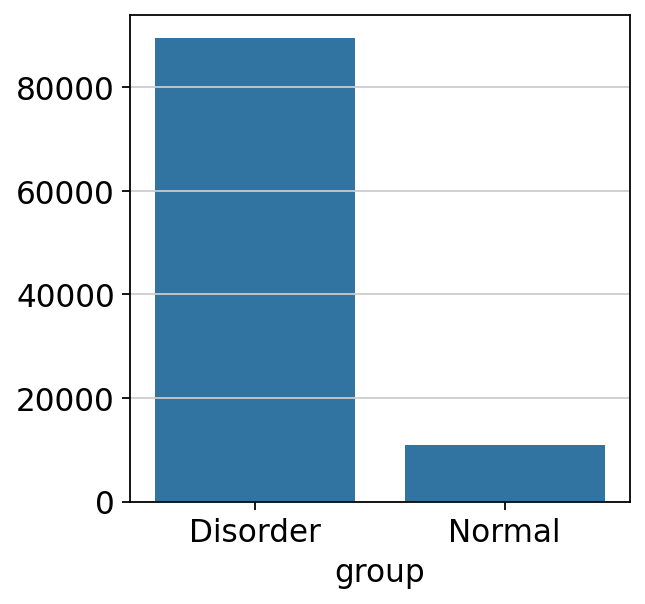

In [10]:
sns.barplot(x=group_counts.index, y=group_counts.values)

/tmp/ipykernel_3974417/3459482835.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["cell_type", "group"]).size().unstack(fill_value=0)


<Axes: xlabel='cell_type'>

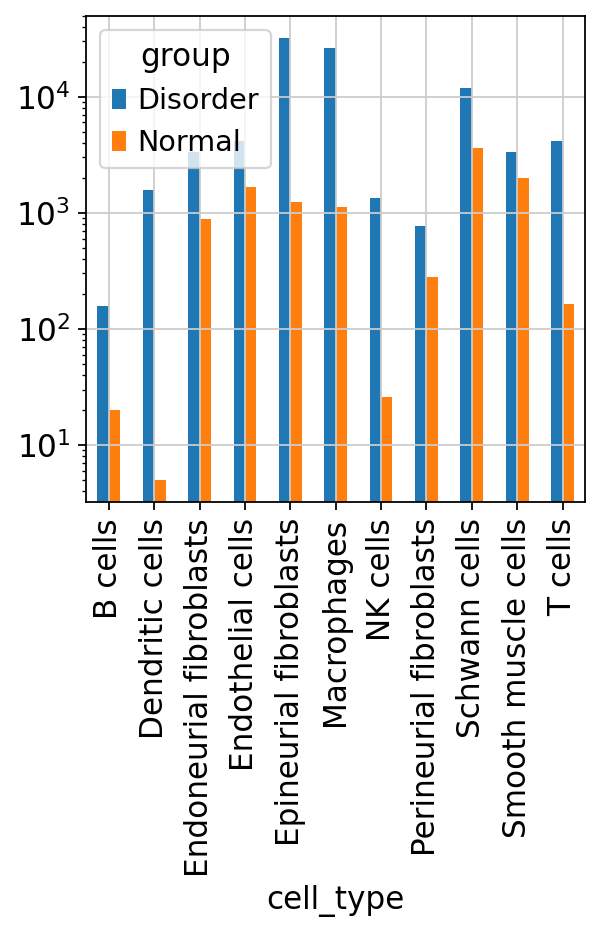

In [11]:
group_cell_type_counts = (
    adata.obs.groupby(["cell_type", "group"]).size().unstack(fill_value=0)
)
group_cell_type_counts.plot(kind="bar", stacked=False, logy=True)

/tmp/ipykernel_3974417/2497979929.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["sample", "cell_type"]).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

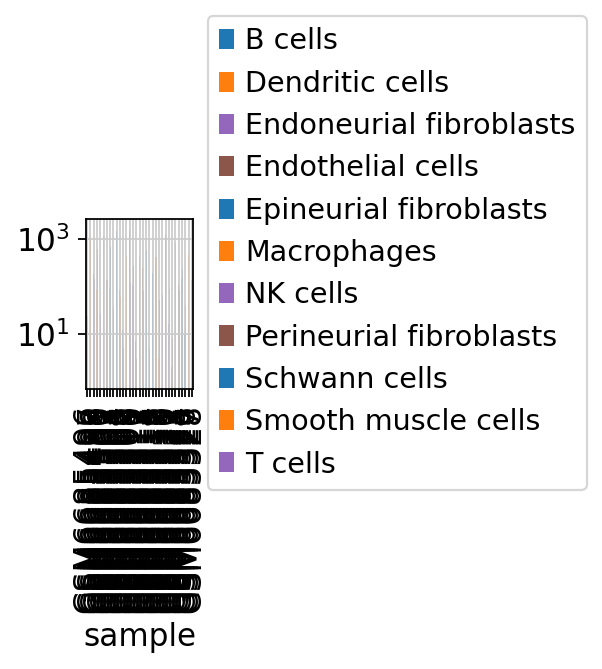

In [12]:
import matplotlib.pyplot as plt

# 设置图片大小
plt.figure(figsize=(10, 5))

# 设置颜色
colors = ["#1f77b4", "#ff7f0e", "#9467bd", "#8c564b"]  # 蓝色，橙色，紫色，棕色

# 绘制堆叠条形图
group_cell_type_counts = (
    adata.obs.groupby(["sample", "cell_type"]).size().unstack(fill_value=0)
)
ax = group_cell_type_counts.plot(kind="bar", stacked=False, logy=True, color=colors)

# # 调整y轴的范围
# ax.set_ylim(1, 10**5)  # 设置y轴的最小值和最大值

# # 将图例放置在左上角
# ax.legend(loc="upper left")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.8))

# 调整布局以适应图例和图形大小
plt.tight_layout()

# 显示图表
plt.show()